- https://github.com/oreilly-japan/deep-learning-from-scratch/tree/master/ch03

In [1]:
import sys, os
from mnist import load_mnist

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [3]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [4]:
import numpy as np
from PIL import Image

%matplotlib inline

In [159]:
import matplotlib.pyplot as plt
def image_show(img):
    # pil_image = Image.fromarray(np.uint8(img))
    # pil_image.show()
    img = img.reshape(28, 28)
    plt.imshow(Image.fromarray(np.uint32(img)))

In [160]:
# (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [161]:
img = x_train[0]
label = t_train[0]
print(label) # 5

5


In [162]:
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

(784,)
(28, 28)


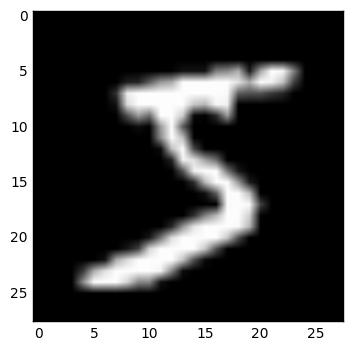

In [163]:
image_show(img)

In [164]:
# 学習済みデータを用いてデータの予測

In [165]:
def get_data():
   (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
   return x_test, t_test

In [166]:
import pickle
def init_network():
    # https://raw.githubusercontent.com/oreilly-japan/deep-learning-from-scratch/master/ch03/sample_weight.pkl
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

In [167]:
def sigmoid(x):
     return 1 / ( 1 + np.exp(-x) )

def softmax(x):
    max_x = np.max(x)
    exp_x = np.exp(x - max_x)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    return y

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

In [168]:
import warnings
warnings.filterwarnings('ignore') # sigmoidでオーバーフローするので見えないように。結果は出るはず。

x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt)/ len(x)))

Accuracy:0.9207


answer: 4


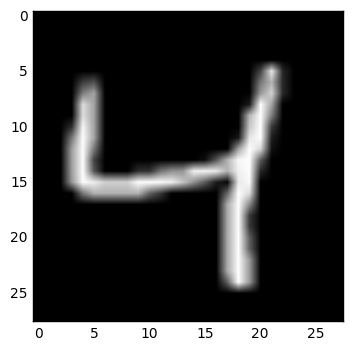

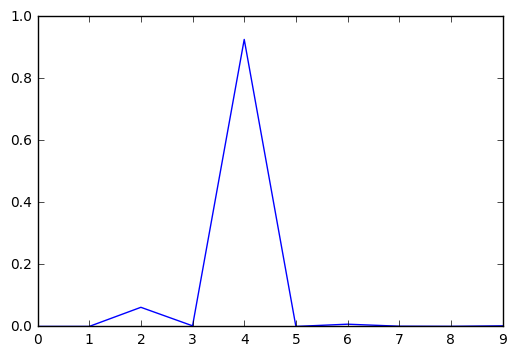

In [170]:
idx=2
img = x_train[idx]
label = t_train[idx]
print("answer: %d" % label)
image_show(img)
plt.show()
y = predict(network,img)
plt.plot(y)